# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The California Department of Education(CDE) would like to evaluate the performance of SAT & ACT in the counties of California, with the aim to increase participation rate and scores of students in California. The first step would be figure out what is the gaps between the counties in the state and explore the factors that contributed to this. As the data scientist appointed, we would like to study the correlation between the tests and macroeconomic effect (GDP) on the participation rate across the state. Does the students in different counties have different performance? Does GDP really has effect on the performance and participation rate? 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
import math

def cal_mean(list_num):
    totalsum = 0
    for num in list_num:
        if not math.isnan(num):
          totalsum += num
    return totalsum/len(list_num)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def cal_std(list_num):
    mean = cal_mean(list_num)
    totalsum = 0
    for num in list_num:      
        if not math.isnan(num):
          totalsum += (num - mean)**2        
    return (totalsum/len(list_num))**0.5

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def clean_pct(x):
    try:
      return float(x.strip('%'))/100
    except:
      pass

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### 2.1.1 Cleaning for California ACT test 2019 dataset

In [5]:
# importing ACT data required for cleaning
act = pd.read_csv('../data/act_2019_ca.csv')

In [6]:
# Quick view on data information
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [7]:
#To heck any missing value
act.isnull().sum()

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [8]:
# drop unnessary columes and rows
act.drop(columns = 'Unnamed: 17',inplace=True)

In [9]:
#Check and drop the entire NA columns
act[act['CDS'].isnull()]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
act.drop(2309,inplace=True)

In [11]:
#Make sure no duplications
act.duplicated().sum()

0

In [12]:
#Strange character, '*' is found
act['PctGE21'].value_counts(ascending=False)

*        532
50.00     22
33.33     10
0.00       9
55.56      9
        ... 
6.56       1
8.00       1
80.81      1
24.53      1
57.58      1
Name: PctGE21, Length: 915, dtype: int64

In [13]:
# Explre on the character "*"
print(act['NumTstTakr'].mean())
print(act[act['AvgScrRead']=="*"]['NumTstTakr'].mean())
print(act[act['AvgScrRead'].isnull()]['NumTstTakr'].mean())

143.18276310090948
5.364661654135339
0.0


####    Average number of total test taker is 143, but for the rows with unidentify score * , only average of 5 test taker, which is insignificant.  The average number of total test taker is 0 for rows with null test score (NA). Hence, to simplyfy the analysis, "*" will be replaced as NA

In [14]:
act.replace('*' , np.nan, inplace=True)

In [15]:
# Change the columns datatypes from string to float
def change_to_float(x):
    try:
      return float(x)
    except:
      pass

act['AvgScrRead'] = act['AvgScrRead'].apply(change_to_float)
act['AvgScrEng'] = act['AvgScrEng'].apply(change_to_float)
act['AvgScrMath'] = act['AvgScrMath'].apply(change_to_float)
act['AvgScrSci'] = act['AvgScrSci'].apply(change_to_float)
act['NumGE21'] = act['NumGE21'].apply(change_to_float)
act['PctGE21'] = act['PctGE21'].apply(change_to_float)

In [16]:
#Converting year to datetime format
act['Year'].replace('2018-19','2019', inplace=True)

In [17]:
act['Year']=act['Year'].apply(pd.to_datetime).dt.year

In [18]:
## 'Rtype' columns exploration
act['RType'].value_counts()

S    1728
D     522
C      58
X       1
Name: RType, dtype: int64

In [19]:
act.groupby('RType')['NumTstTakr'].sum()

RType
C    82668.0
D    82619.0
S    82654.0
X    82668.0
Name: NumTstTakr, dtype: float64

#### The data that categorized by county(C), district(D), schoold(S) and state(X) are very much comparable. So we will just select the RType = C (County) in our analysis which is the only variable that required in this project

In [20]:
act = act[act['RType']=='C'].reset_index(drop=True)

In [21]:
# delete the unnessary columns 
act = act.drop(columns=['CDS','CCode','CDCode','SCode','RType','SName','DName','AvgScrRead','AvgScrEng','AvgScrMath','AvgScrSci','Year'])

In [22]:
#columns name modification function

def column_naming(test,row):
    row_n = [row[0].lower()]
    for i in row[1:]: 
        i = (str(test)+"_"+str(i)).strip()
        i = i.lower()
        row_n.append(i)
    return row_n

In [23]:
act_columns_new= column_naming('ACT', act.columns)
act.columns = act_columns_new

In [24]:
#saving clean data as csv file
act.to_csv('../data/act19_ca_cleaned.csv')

### 2.1.2 Cleaning for California SAT test 2019 dataset

In [25]:
# Importing SAT Data for cleaning
sat = pd.read_csv('../data/sat_2019_ca.csv')

In [26]:
# remove the unnessary columns (Only use grade 12(senior year) data here to compare with ACT data )
sat.drop(columns=['CDS','CCode','CDCode','SCode','DName','SName','Enroll11','NumTSTTakr11','NumERWBenchmark11','PctERWBenchmark11','NumMathBenchmark11','PctMathBenchmark11',
                      'TotNumBothBenchmark11','PctBothBenchmark11','Unnamed: 25'],inplace=True)

In [27]:
# convert the datatypes
sat['NumERWBenchmark12'] = sat['NumERWBenchmark12'].apply(change_to_float)
sat['PctERWBenchmark12'] = sat['PctERWBenchmark12'].apply(change_to_float)
sat['NumMathBenchmark12'] = sat['NumMathBenchmark12'].apply(change_to_float)
sat['PctMathBenchmark12'] = sat['PctMathBenchmark12'].apply(change_to_float)
sat['TotNumBothBenchmark12'] = sat['TotNumBothBenchmark12'].apply(change_to_float)
sat['PctBothBenchmark12'] = sat['PctBothBenchmark12'].apply(change_to_float)

In [28]:
# Finf the rows with missing value
sat[sat['Year'].isnull()]

,RType,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
2579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Drop the unnessary row
sat.drop(2579, inplace=True)

In [30]:
# Convert datetime
sat['Year'].replace('2018-19','2019', inplace=True)
sat['Year']=sat['Year'].apply(pd.to_datetime).dt.year

In [31]:
# Replace asterisk with NA
sat.replace('*',np.nan)

,RType,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
0,S,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,S,Colusa,29.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,S,Los Angeles,206.0,102.0,31.0,30.39,14.0,13.73,14.0,13.73,2019
3,S,Los Angeles,227.0,113.0,54.0,47.79,18.0,15.93,18.0,15.93,2019
4,S,Los Angeles,18.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...
2574,D,Stanislaus,179.0,40.0,23.0,57.50,13.0,32.50,11.0,27.50,2019
2575,D,Yolo,717.0,307.0,293.0,95.44,274.0,89.25,268.0,87.30,2019
2576,C,Contra Costa,14593.0,5412.0,3798.0,70.18,2814.0,52.00,2721.0,50.28,2019
2577,C,Lake,667.0,167.0,123.0,73.65,71.0,42.51,65.0,38.92,2019


In [32]:
# Filter out the nessary data (Rtype = 'C') for analysis on County only
sat = sat[sat['RType']=='C']

In [33]:
# Columns naming
sat_columns_new= column_naming('SAT', sat.columns)
sat.columns = sat_columns_new

In [34]:
# Drop the unwanted columns before merge
sat.drop(columns=["rtype",'sat_year'],inplace=True)
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1981 to 2578
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sat_cname                  58 non-null     object 
 1   sat_enroll12               58 non-null     float64
 2   sat_numtsttakr12           58 non-null     float64
 3   sat_numerwbenchmark12      55 non-null     float64
 4   sat_pcterwbenchmark12      55 non-null     float64
 5   sat_nummathbenchmark12     55 non-null     float64
 6   sat_pctmathbenchmark12     55 non-null     float64
 7   sat_totnumbothbenchmark12  55 non-null     float64
 8   sat_pctbothbenchmark12     55 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.5+ KB


In [35]:
# saving data to csv file
sat.to_csv('../data/sat19_ca_cleaned.csv')

### 2.1.3 GDP Data Cleaning

In [36]:
GDP = pd.read_csv('../data/GDP_data_by_county_2017_2019.csv',skiprows=4)

In [37]:
GDP.head()

,GeoFips,GeoName,2017,2018,2019
0,01001,"Autauga, AL",1587695,1602077,1540762
1,01003,"Baldwin, AL",6453588,6799715,7134734
2,01005,"Barbour, AL",721125,730518,729105
3,01007,"Bibb, AL",353234,353016,380453
4,01009,"Blount, AL",920401,967135,932215


In [38]:
# Check any missing dat
GDP.isnull().sum()

GeoFips     0
GeoName    11
2017       11
2018       11
2019       11
dtype: int64

In [39]:
GDP.dropna(inplace=True)

In [40]:
#Confirm the number of county :58 counties in Califonia
GDP['GeoName'].str.contains('CA').sum()

58

In [41]:
# filter the rows of county in Califonia
GDP = GDP[GDP['GeoName'].str.contains('CA')].reset_index(drop=True)

In [42]:
# create new columns to get only county name
GDP[['cname','state']] = GDP['GeoName'].str.split(',',expand=True)

In [43]:
# drop unessary columns
GDP.drop(columns=['GeoName','GeoFips','2017','2018'],inplace=True)

In [44]:
# Change GDP dtype to float
GDP['2019'] = GDP['2019'].apply(change_to_float)*1000

In [45]:
# rename to readable column name
GDP.rename(columns={'2019':'GDP'},inplace=True)

In [46]:
# saving clean data
GDP.to_csv("../data/GDP_ca.csv")

### 2.1.4 Population and household income data cleaning

In [47]:
popu = pd.read_excel('../data/datapile_-_headline_datasets_-_current.xlsx', sheet_name='People')

In [48]:
popu.head()

,County,Population (January 2019),Population in Group Quarters (January 2019),Population: Unincorporated (January 2019),"Population: Unincorporated, Group Quarters (January 2019)",Race/Ethnicity: American Indian (2019),Race/Ethnicity: Asian (2019),Race/Ethnicity: Black (2019),Race/Ethnicity: Hispanic (2019),Race/Ethnicity: Multi-Racial/Ethnic (2019),...,Registered Voters: Republican (February 2019),Registered Voters: Other Party (February 2019),Labor Force: Employed (2018),Labor Force: Unemployed (2018),Labor Force: Unemployment Rate (2018),Poverty: All Ages (2017),Poverty: All Ages Percent (2017),Poverty: Under 18 (2017),Poverty: Under 18 Percent (2017),Median Household Income (2017)
0,Alameda,1669301,39821,149536,2356.0,4849,443972,192977,391815,69855,...,95587,31070,822800,25400,0.030,152087,0.093,35658,0.105,95550
1,Alpine,1162,24,1162,24.0,202,6,1,85,22,...,200,42,520,30,0.046,202,0.181,67,0.353,55755
2,Amador,38294,4362,21774,151.0,594,454,1024,5311,1021,...,9809,1439,14120,590,0.040,3762,0.109,908,0.157,60588
3,Butte,226466,4970,78702,360.0,3361,10141,3666,35848,8801,...,41330,7398,97600,5100,0.049,40728,0.181,10208,0.226,48634
4,Calaveras,45117,507,41277,460.0,532,589,371,5114,1320,...,12200,2173,20510,850,0.040,5904,0.131,1590,0.211,58536


In [49]:
#Filter out the data that we interested only
popu = popu[['County','Population (January 2019)','Median Household Income (2017)','Labor Force: Unemployment Rate (2018)']]

In [50]:
# rename columns to standard naming in this workook
popu.rename(columns={'County':'cname',
                    'Population (January 2019)':"population",
                   'Median Household Income (2017)':"median_household_income" ,
                    'Labor Force: Unemployment Rate (2018)':'unemployment_rate'},inplace=True)

### 2.1.5  Data Merging

In [51]:
# merging of GDP and population data
GDP_Popu = pd.merge(left = GDP,
                   right = popu,
                   on = "cname",
                   )

In [52]:
# merging with ACT test data
act_GDP_Popu = pd.merge(left = act,
                       right = GDP_Popu,
                       on = "cname")

In [53]:
# merging with SAT test data
combined_data =  pd.merge(left = sat,
                       right = act_GDP_Popu,
                       left_on = "sat_cname",
                         right_on = "cname")

In [54]:
combined_data.head()

,sat_cname,sat_enroll12,sat_numtsttakr12,sat_numerwbenchmark12,sat_pcterwbenchmark12,sat_nummathbenchmark12,sat_pctmathbenchmark12,sat_totnumbothbenchmark12,sat_pctbothbenchmark12,cname,act_enroll12,act_numtsttakr,act_numge21,act_pctge21,GDP,state,population,median_household_income,unemployment_rate
0,El Dorado,2226.0,604.0,547.0,90.56,458.0,75.83,442.0,73.18,El Dorado,2226.0,465.0,358.0,76.99,7.435270e+09,CA,191848,78464,0.036
1,Los Angeles,114618.0,48676.0,30081.0,61.80,19791.0,40.66,18555.0,38.12,Los Angeles,114618.0,20678.0,9182.0,44.40,7.037813e+11,CA,10253716,64912,0.047
2,Madera,2352.0,442.0,277.0,62.67,136.0,30.77,127.0,28.73,Madera,2352.0,375.0,125.0,33.33,6.194111e+09,CA,159536,50783,0.070
3,Yolo,2299.0,759.0,586.0,77.21,464.0,61.13,443.0,58.37,Yolo,2299.0,355.0,223.0,62.82,1.396475e+10,CA,222581,64900,0.042
4,Kern,14229.0,3793.0,2334.0,61.53,1481.0,39.05,1364.0,35.96,Kern,14229.0,1257.0,544.0,43.28,4.922121e+10,CA,916464,49904,0.080


In [55]:
#Final filtering for the columns that needed in analysis
combined_data.drop(columns = ['sat_cname','sat_numerwbenchmark12','sat_pcterwbenchmark12','sat_nummathbenchmark12','sat_pctmathbenchmark12'],inplace=True)

In [56]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sat_enroll12               58 non-null     float64
 1   sat_numtsttakr12           58 non-null     float64
 2   sat_totnumbothbenchmark12  55 non-null     float64
 3   sat_pctbothbenchmark12     55 non-null     float64
 4   cname                      58 non-null     object 
 5   act_enroll12               58 non-null     float64
 6   act_numtsttakr             58 non-null     float64
 7   act_numge21                54 non-null     float64
 8   act_pctge21                54 non-null     float64
 9   GDP                        58 non-null     float64
 10  state                      58 non-null     object 
 11  population                 58 non-null     int64  
 12  median_household_income    58 non-null     int64  
 13  unemployment_rate          58 non-null     float64
d

In [57]:
# saving of final cleaned combination of data
combined_data.to_csv("../data/combined_data.csv")

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


**Data Dictionary for cleaned combine dataset**
 
|Feature|Type|Dataset|Description|
|---|---|---|---|
|sat_enroll12|float64|combined_data|SAT Enrollment of Grade 12 in Califonia, 2019|
|sat_numtsttakr12|float64|combined_data|SAT Number of Test Takers of Grade 12 in Califonia, 2019|
|sat_totnumbothbenchmark12|float64|combined_data|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math, 2019| 
|sat_pctbothbenchmark12|float64|combined_data|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math), Califonia 2019|
|cname|string|combined_data|County Name in Califonia| 
|act_enroll12|float64|combined_data|ACT Enrollment of Grade 12 in Califonia, 2019| 
|act_numtsttakr|float64|combined_data|ACT Number of Test Takers of Grade 12 in Califonia, 2019|
|act_numge21|float64|combined_data|Number of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 Califonia, 2019| 
|act_pctge21|float64|combined_data|Percent of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 Califonia, 2019|
|GDP|float64|combined_data|GDP number for every county in Califonia in year 2019|
|state|string|combined_data|Indication of state of Califonia, 2019|
|population|int64|combined_data|Distribution of population in every county of Califonia in year 2019|
|median_household_income|int64|combined_data|Describe the average household income for every county county of Califonia in year 2019|
|unemployment_rate|float64|combined_data|Average unemployment rate for every county county of Califonia in year 2019|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### 2.3 Standard deviation of the values in the combined dataframe

In [58]:
df_std = {col : round(cal_std(combined_data[col]),3) for col in combined_data.columns if combined_data[col].dtypes != object}
df_std

{'sat_enroll12': 17193.996,
 'sat_numtsttakr12': 7018.076,
 'sat_totnumbothbenchmark12': 2847.161,
 'sat_pctbothbenchmark12': 13.031,
 'act_enroll12': 17193.996,
 'act_numtsttakr': 3136.861,
 'act_numge21': 1602.441,
 'act_pctge21': 16.86,
 'GDP': 107809222096.591,
 'population': 1480644.243,
 'median_household_income': 19258.664,
 'unemployment_rate': 0.026}

### 2.3.1 Preprocessing of data for EDA

In [59]:
df = pd.read_csv("../data/combined_data.csv")

In [60]:
df.drop(columns='Unnamed: 0',inplace=True)

In [61]:
df.head()

,sat_enroll12,sat_numtsttakr12,sat_totnumbothbenchmark12,sat_pctbothbenchmark12,cname,act_enroll12,act_numtsttakr,act_numge21,act_pctge21,GDP,state,population,median_household_income,unemployment_rate
0,2226.0,604.0,442.0,73.18,El Dorado,2226.0,465.0,358.0,76.99,7.435270e+09,CA,191848,78464,0.036
1,114618.0,48676.0,18555.0,38.12,Los Angeles,114618.0,20678.0,9182.0,44.40,7.037813e+11,CA,10253716,64912,0.047
2,2352.0,442.0,127.0,28.73,Madera,2352.0,375.0,125.0,33.33,6.194111e+09,CA,159536,50783,0.070
3,2299.0,759.0,443.0,58.37,Yolo,2299.0,355.0,223.0,62.82,1.396475e+10,CA,222581,64900,0.042
4,14229.0,3793.0,1364.0,35.96,Kern,14229.0,1257.0,544.0,43.28,4.922121e+10,CA,916464,49904,0.080


In [62]:
## Analysis would base on GDP per capital
df['GDP_cap'] = df['GDP']/df['population']

In [63]:
## Iteration of each test's participation rate 
df['Part_act'] = df['act_numtsttakr']/df['act_enroll12']
df['Part_sat'] = df['sat_numtsttakr12']/df['sat_enroll12']

In [64]:
#Categorise of county: URBAN, SUBURBAN, RURAL - California County Caucuses by Califonia State Association of Counties
County_dict = {'urban': ['Los Angeles','Alameda','Contra Costa','Fresno','Orange','Riverside','Sacramento','San Bernardino'
                      ,'San Diego','San Francisco','San Joaquin','San Mateo','Santa Clara','Ventura'],
            'suburban':['Yolo','Butte','Imperial','Kern','Marin','Merced','Monterey','Napa','Placer','San Luis Obispo',
                      'Santa Barbara','Santa Cruz','Shasta','Solano','Sonoma','Stanislaus','Tulare'],
              'rural':['Alpine','Amador','Colusa','Del Norte','El Dorado','Glenn', 'Humboldt','Inyo','Kings','Lake',
                     'Lassen','Madera','Mariposa','Mendocino','Modoc','Mono','Nevada','Plumas','San Benito','Sierra',
                     'Siskiyou','Sutter','Tehama','Trinity','Tuolumne','Yuba','Calaveras']}

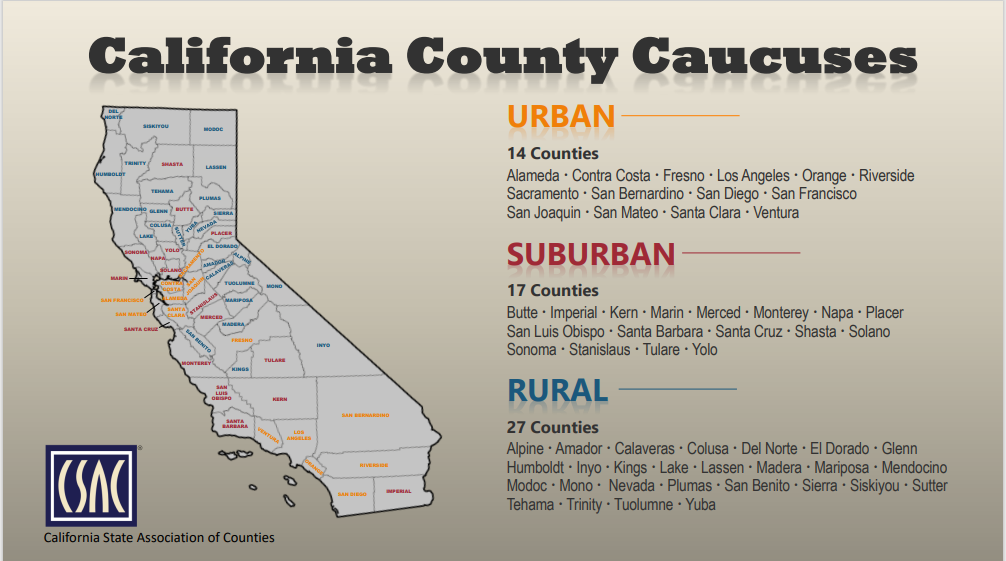

In [65]:
from IPython.display import Image
Image(filename='County.png') 

In [66]:
def county_class(x):
    for key, values in County_dict.items():
        if x in values:
            return key

df['Caucuses']=df['cname'].apply(county_class)

### 2.3.2 Comparison of ACT and SAT in California state by counties

#### 2.3.2.1 Comparison on the percentage of student that perform better than benchmarks

In [67]:
r, p_values = stats.pearsonr(df['act_pctge21'].fillna(df['act_pctge21'].mean()), df['sat_pctbothbenchmark12'].fillna(df['sat_pctbothbenchmark12'].mean()))
print('The Pearson correlation coefficient between two test score is:',r)
print('P-value                                                       ',p_values)

The Pearson correlation coefficient between two test score is: 0.6922855629225673
P-value                                                        1.750759319849797e-09


Text(0.5, 49.99999999999995, 'SAT test')

<Figure size 288x288 with 0 Axes>

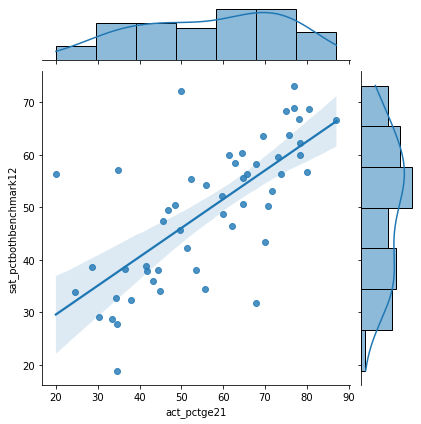

In [68]:
plt.figure(figsize=(4,4))
sns.jointplot(data=df, x="act_pctge21", y="sat_pctbothbenchmark12", kind='reg')
plt.ylabel('ACT test ')
plt.xlabel('SAT test')

#### Interpretation: The ACT and SAT tests' score are highly correlated with each other in the California, the county with good ACT performance tends to have good SAT performance too.

In [69]:
## Stastistical data calculation
## comparing the mean of the tests score 

act_scr_mean = act['act_pctge21'].mean()
sat_scr_mean = sat['sat_pctbothbenchmark12'].mean()
scr_pct_diff = 100*(act_scr_mean-sat_scr_mean)/(act_scr_mean)
act_scr_mean1 = round(100* act[act['act_pctge21']>act_scr_mean].count()/len(act),2)
sat_scr_mean1 = round(100* sat[sat['sat_pctbothbenchmark12']>sat_scr_mean].count()/len(sat),2)

print(f'The average score of ACT is {round(act_scr_mean,2)} and for SAT is {round(sat_scr_mean,2)}')
print(f'The Counties that the students perform above benchmarks is {act_scr_mean1[0]}% for ACT test 2019 in Ca')
print(f'The Counties that the students perform above benchmarks is {sat_scr_mean1[0]}% for SAT test 2019 in Ca')
print(f'The performance of ACT is higher than SAT by {round(scr_pct_diff,2)}% ')

The average score of ACT is 56.76 and for SAT is 49.72
The Counties that the students perform above benchmarks is 48.28% for ACT test 2019 in Ca
The Counties that the students perform above benchmarks is 51.72% for SAT test 2019 in Ca
The performance of ACT is higher than SAT by 12.39% 


Text(0.5, 1.0, 'Performance of tests in Califonia')

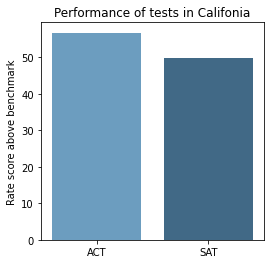

In [70]:
plt.figure(figsize=(4,4))
x= ['ACT','SAT']
y = [act_scr_mean,sat_scr_mean]
sns.barplot(x=x,y=y,palette="Blues_d")
plt.ylabel('Rate score above benchmark')
plt.title('Performance of tests in Califonia')

#### Interpretation: The performance of tests in California is quite comparable. However, ACT still outscore SAT by 12.39%

In [71]:
# Comparison of performance by the urbanisation counties
df.groupby('Caucuses')['act_pctge21','sat_pctbothbenchmark12'].mean()

C:\Users\Sing\AppData\Local\Temp/ipykernel_18640/1304871792.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Caucuses')['act_pctge21','sat_pctbothbenchmark12'].mean()


,act_pctge21,sat_pctbothbenchmark12
Caucuses,,
rural,55.869130,49.998333
suburban,57.097647,50.350000
urban,57.803571,48.490000


Text(0.5, 1.0, 'SAT test performance in California')

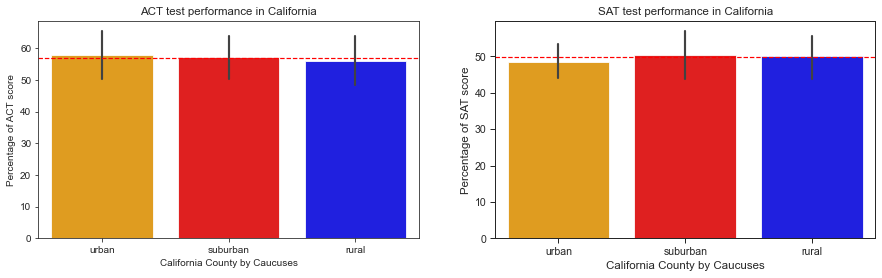

In [72]:
sns.set_style('ticks')
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)

sns.set_context('paper', font_scale=1.2) 
sns.barplot(x='Caucuses', y='act_pctge21',data=df, estimator=np.mean, order =['urban','suburban','rural'],palette=['orange', 'red', 'blue'])
plt.axhline(y =act_scr_mean , color = 'r', linestyle = 'dashed') 
plt.xlabel('California County by Caucuses')
plt.ylabel('Percentage of ACT score')
plt.title('ACT test performance in California')

plt.subplot(1, 2, 2)
sns.set_context('paper', font_scale=1.2) 
sns.barplot(x='Caucuses', y='sat_pctbothbenchmark12',data=df, estimator=np.mean,order =['urban','suburban','rural'],palette=['orange', 'red', 'blue'])
plt.axhline(y =sat_scr_mean , color = 'r', linestyle = 'dashed') 
plt.xlabel('California County by Caucuses')
plt.ylabel('Percentage of SAT score')
plt.title('SAT test performance in California')

#### Interpretation: The performance of tests in California with different caucuses (urban, suburban, rural) are comparable. The highest score for ACT test is in urban counties with 57.8% but for SAT, it is in suburban counties with 50.35%

In [73]:
## Since the tests result is highly correlation, combine their result for future analysis
combine_scr = df[['act_pctge21','sat_pctbothbenchmark12','cname']]
combine_scr['act_pctge21'].fillna(df['act_pctge21'].mean(),inplace=True)
combine_scr['sat_pctbothbenchmark12'].fillna(df['sat_pctbothbenchmark12'].mean(),inplace=True)
combine_scr['total_scr'] = df['act_pctge21']+df['sat_pctbothbenchmark12']
combine_scr = combine_scr.sort_values(by=['total_scr'],ascending=False)[['cname','total_scr']].reset_index(drop=True)
combine_scr.head()

C:\Users\Sing\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Sing\AppData\Local\Temp/ipykernel_18640/136242435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_scr['total_scr'] = df['act_pctge21']+df['sat_pctbothbenchmark12']


,cname,total_scr
0,Calaveras,153.77
1,El Dorado,150.17
2,Marin,149.29
3,Placer,145.77
4,Santa Clara,144.81


#### Interpretation: Counties with best scoring in both test: Calaveras, El Dorado, Marin, Placer, Santa Clara.

#### 2.3.2.2 Comparison on the participation rate between two test

<Figure size 288x288 with 0 Axes>

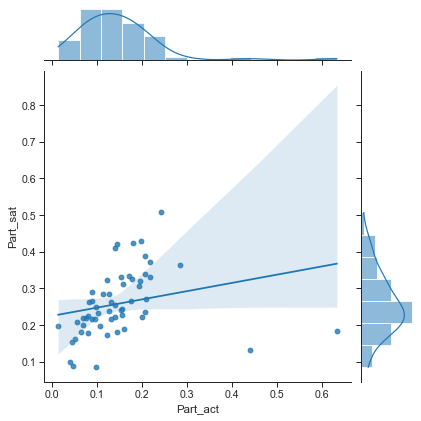

In [74]:
## Overview the data
plt.figure(figsize=(4,4))
sns.jointplot(data=df, x='Part_act', y='Part_sat', kind='reg')

#### Notice there are two outliers that generate noise to the data

In [75]:
## use a new data frame to fine tune the correlation
## Decide whether appropriate to take off the two outlier
df[['cname','Part_act']].sort_values(by='Part_act',ascending=False).head(2)

,cname,Part_act
48,Modoc,0.632184
36,Tehama,0.438953


In [76]:
df[(df['cname']=='Modoc')|(df['cname']=='Tehama')]['act_numtsttakr']

36    302.0
48     55.0
Name: act_numtsttakr, dtype: float64

In [77]:
df[['act_numtsttakr']].mean()

act_numtsttakr    1425.310345
dtype: float64

##### Interpretation: The number of ACT test taker in Modoc and Tehama is relatively small compare to other county in the data.Hence, they will be dropped for a more consistent analysis.

In [78]:
## A new dataset is used
df_part_corr = df.drop([48,36])

<Figure size 288x288 with 0 Axes>

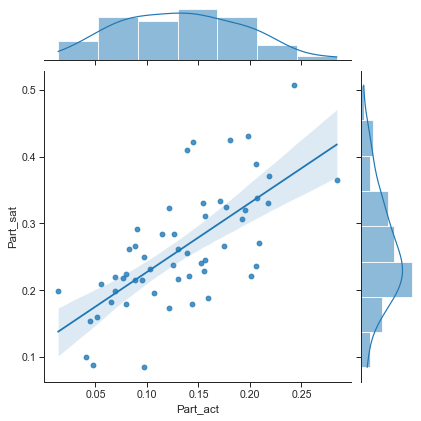

In [79]:
plt.figure(figsize=(4,4))
sns.jointplot(data=df_part_corr, x='Part_act', y='Part_sat', kind='reg')

In [80]:
r, p_values = stats.pearsonr(df_part_corr['Part_act'].fillna(df_part_corr['Part_act'].mean()), df_part_corr['Part_sat'].fillna(df_part_corr['Part_sat'].mean()))
print('The Pearson correlation coefficient for both test participation rate is',r)
print('P-value                                                                ',p_values)

The Pearson correlation coefficient for both test participation rate is 0.6911948581262393
P-value                                                                 3.704505857561209e-09


####  Interpretation: The participation rate of ACT and SAT in California are highly correlated, provided excluding data from Tehama and Modoc

In [81]:
## Stastistical data calculation
## comparing the mean of the participation rate 

act_part_mean = df['Part_act'].mean()
sat_part_mean = df['Part_sat'].mean()
Pct_dff = 100*(sat_part_mean-act_part_mean)/sat_part_mean
act_part_mean1 = round(100* df[df['Part_act']>act_part_mean].count()/len(act),2)
sat_part_mean1 = round(100* df[df['Part_sat']>sat_part_mean].count()/len(sat),2)

print(f'The average participation of ACT is {round(act_part_mean,2)} and for SAT is {round(sat_part_mean,2)}')
print(f'The number of County that participation rate above average is {act_part_mean1[0]}% for ACT test 2019 in Ca')
print(f'The number of County that participation rate above average is {sat_part_mean1[0]}% for SAT test 2019 in Ca')
print(f'The participation rate of SAT is higher by {round(Pct_dff,2)}% than ACT')

The average participation of ACT is 0.15 and for SAT is 0.26
The number of County that participation rate above average is 41.38% for ACT test 2019 in Ca
The number of County that participation rate above average is 43.1% for SAT test 2019 in Ca
The participation rate of SAT is higher by 42.86% than ACT


Text(0.5, 1.0, 'Participation rate of tests in California')

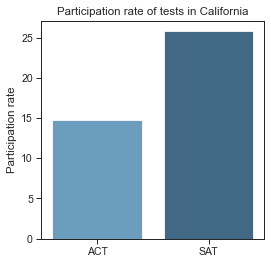

In [82]:
plt.figure(figsize=(4,4))
x= ['ACT','SAT']
y = [act_part_mean*100,sat_part_mean*100]
sns.barplot(x=x,y=y,palette="Blues_d")
plt.ylabel('Participation rate')
plt.title('Participation rate of tests in California')

#### Interpretation: The participation rate of SAT in Califonia is higher than ACT by 42.86%

In [83]:
# Comparison of participation rate by the urbanisation of counties
df_part_corr.groupby('Caucuses')['Part_act','Part_sat'].mean()

C:\Users\Sing\AppData\Local\Temp/ipykernel_18640/1871490203.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_part_corr.groupby('Caucuses')['Part_act','Part_sat'].mean()


,Part_act,Part_sat
Caucuses,,
rural,0.098435,0.194778
suburban,0.145979,0.269984
urban,0.177975,0.366656


Text(0.5, 1.0, 'SAT participation rate in California')

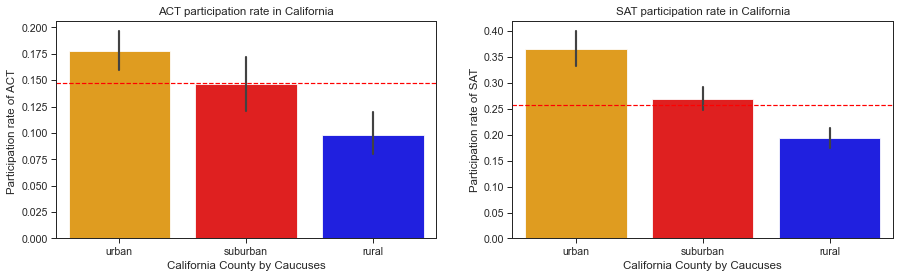

In [84]:
sns.set_style('ticks')
plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)

sns.set_context('paper', font_scale=1.2) 
sns.barplot(x='Caucuses', y='Part_act',data=df_part_corr, estimator=np.mean,order =['urban','suburban','rural'],palette=['orange', 'red', 'blue'])
plt.axhline(y =act_part_mean , color = 'r', linestyle = 'dashed') 
plt.xlabel('California County by Caucuses')
plt.ylabel('Participation rate of ACT ')
plt.title('ACT participation rate in California')

plt.subplot(1, 2, 2)

sns.set_context('paper', font_scale=1.2) 
sns.barplot(x='Caucuses', y='Part_sat',data=df_part_corr, estimator=np.mean,order =['urban','suburban','rural'],palette=['orange', 'red', 'blue'])
plt.axhline(y =sat_part_mean , color = 'r', linestyle = 'dashed') 
plt.xlabel('California County by Caucuses')
plt.ylabel('Participation rate of SAT')
plt.title('SAT participation rate in California')

#### Interpretation: The participation rate of tests in California is increasing with caucuses (urban, suburban, rural) . The highest part rate for ACT test is in urban counties with 17.8% and for SAT, it is in urban counties too,  with 36.7%

### 2.3.3 EDA association of GDP with ACT/SAT test in California

In [85]:
# Analyse the relation between caucuses and DGP
# Overview of data
df_cau = df.groupby('Caucuses')['sat_pctbothbenchmark12','act_pctge21','GDP_cap','Part_act',
                               'Part_sat'].mean()
df_cau.head()

C:\Users\Sing\AppData\Local\Temp/ipykernel_18640/1482563935.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cau = df.groupby('Caucuses')['sat_pctbothbenchmark12','act_pctge21','GDP_cap','Part_act',


,sat_pctbothbenchmark12,act_pctge21,GDP_cap,Part_act,Part_sat
Caucuses,,,,,
rural,49.998333,55.869130,41983.888642,0.132061,0.191955
suburban,50.350000,57.097647,53904.317671,0.145979,0.269984
urban,48.490000,57.803571,81222.135535,0.177975,0.366656


Text(0.5, 1.0, 'GDP versus Caucuses')

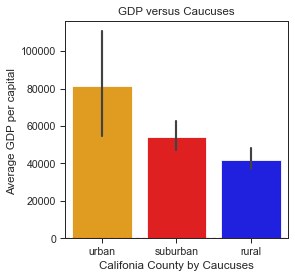

In [86]:
sns.set_style('ticks')
plt.figure(figsize=(4,4))
sns.set_context('paper', font_scale=1.2) 
sns.barplot(x='Caucuses', y='GDP_cap',data=df, estimator=np.mean,order =['urban','suburban','rural'],palette=['orange', 'red', 'blue'])
plt.axhline(y =act_part_mean , color = 'r', linestyle = 'dashed') 
plt.xlabel('Califonia County by Caucuses')
plt.ylabel('Average GDP per capital ')
plt.title('GDP versus Caucuses')

#### Interpretation: There is postitive relation of GDP per capital from rural to urban county. (Make sense!)

In [87]:
## Determine the correlation between tests and GDP_cap
r1, p_values1 = stats.pearsonr(df['act_pctge21'].fillna(df['act_pctge21'].mean()), df['GDP_cap'].fillna(0))
r2, p_values2 = stats.pearsonr(df['sat_pctbothbenchmark12'].fillna(df['sat_pctbothbenchmark12'].mean()), df['GDP_cap'].fillna(0))
print(f'The Pearson correlation between ACT test performance and GDP/Cap is {round(r1,2)}, \nfor SAT versus GDP/cap is {round(r2,2)}')

The Pearson correlation between ACT test performance and GDP/Cap is 0.26, 
for SAT versus GDP/cap is 0.25


<Figure size 288x288 with 0 Axes>

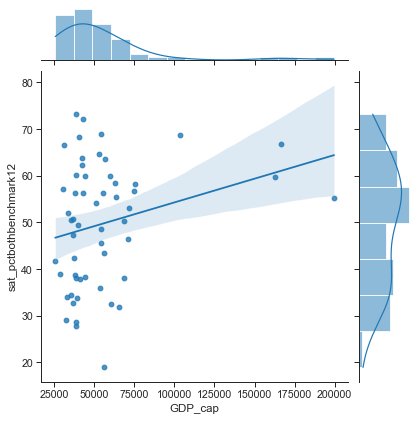

In [88]:
# Plot to show the relation between GDP and test performance
plt.figure(figsize=(4,4))
sns.jointplot(data=df, x='GDP_cap', y='sat_pctbothbenchmark12', kind='reg')

<Figure size 288x288 with 0 Axes>

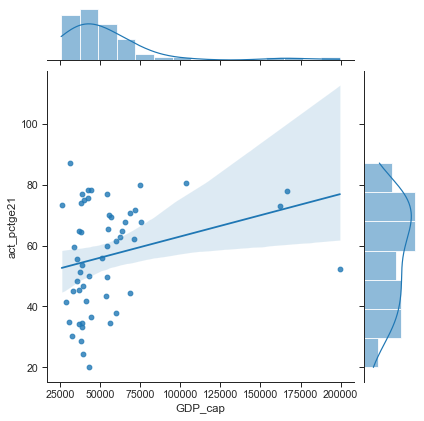

In [89]:
plt.figure(figsize=(4,4))
sns.jointplot(data=df, x='GDP_cap', y='act_pctge21', kind='reg')

In [90]:
# Statistical Calculation on effect of GDP on test result, categorized by their caucuses
act_scr_urban = df[df['Caucuses']=="urban"]['act_pctge21']
sat_scr_urban = df[df['Caucuses']=="urban"]['sat_pctbothbenchmark12']

In [91]:
def higher_mean (x,n):
    counter = 0
    for i in x:
        if i > n:
            counter+=1
    a = round(100*counter/len(x),2)
    return a

print(f'For ACT test in urban county, there is {higher_mean(act_scr_urban,act_scr_mean)}% of county perform above average')

For ACT test in urban county, there is 50.0% of county perform above average


In [92]:
print(f'For SAT test in urban county, there is {higher_mean(sat_scr_urban,sat_scr_mean)}% of county perform above average')

For SAT test in urban county, there is 50.0% of county perform above average


#### Interpretation: The test performance fo student do not show strong association with the GDP of the counties.

In [93]:
df[['cname','act_pctge21']].sort_values(by='act_pctge21',ascending=False).head(3)

,cname,act_pctge21
10,Calaveras,87.10
18,Marin,80.48
34,Mono,80.00


In [94]:
## Now is to explore the rassociation between participation rate of tests and DGP
## Note: Tehama and Modoc in ACT test will be excluded in analysis due to outlier 

r1, p_values1 = stats.pearsonr(df_part_corr['Part_act'].fillna(df_part_corr['Part_act'].mean()), df_part_corr['GDP_cap'])
r2, p_values2 = stats.pearsonr(df_part_corr['Part_sat'].fillna(df_part_corr['Part_sat'].mean()), df_part_corr['GDP_cap'])
print(f'The correlation between ACT participation and GDP/Cap is {round(r1,2)}, \nfor SAT versus GDP/cap is {round(r2,2)}')

The correlation between ACT participation and GDP/Cap is 0.49, 
for SAT versus GDP/cap is 0.57


<Figure size 288x288 with 0 Axes>

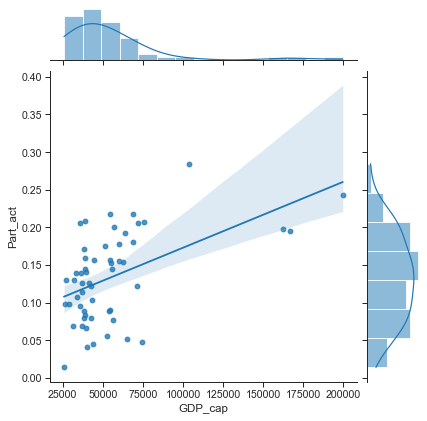

In [95]:
plt.figure(figsize=(4,4))
sns.jointplot(data=df_part_corr, x='GDP_cap', y='Part_act', kind='reg')

<Figure size 288x288 with 0 Axes>

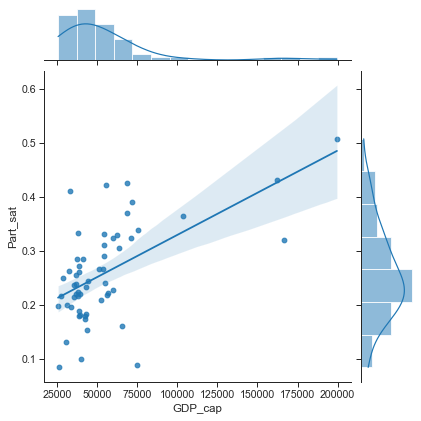

In [96]:
plt.figure(figsize=(4,4))
sns.jointplot(data=df, x='GDP_cap', y='Part_sat', kind='reg')

In [97]:
# Statistical Calculation on effect of GDP on test participationrate,categorized by their caucuses
act_part_urban = df_part_corr[df_part_corr['Caucuses']=="urban"]['Part_act']
sat_part_urban = df[df['Caucuses']=="urban"]['Part_sat']
act_part_rural = df_part_corr[df_part_corr['Caucuses']=="rural"]['Part_act']
sat_part_rural = df[df['Caucuses']=="rural"]['Part_sat']
act_part_mean = df_part_corr['Part_act'].mean()
sat_part_mean = df['Part_sat'].mean()

In [98]:
print(f'For ACT test participation rate  in urban county, there is {higher_mean(act_part_urban,act_part_mean)}% of county has higher rate than average')
print(f'For SAT test participation rate  in urban county, there is {higher_mean(sat_part_urban,sat_part_mean)}% of county has higher rate than average')

For ACT test participation rate  in urban county, there is 85.71% of county has higher rate than average
For SAT test participation rate  in urban county, there is 100.0% of county has higher rate than average


In [99]:
def lower_mean (x,n):
    counter = 0
    for i in x:
        if i < n:
            counter+=1
    a = round(100*counter/len(x),2)
    return a

print(f'For ACT test participation rate  in rural county, there is {lower_mean(act_part_rural,act_part_mean)}% of county has lower rate than average')
print(f'For SAT test participation rate  in rural county, there is {lower_mean(sat_part_rural,sat_part_mean)}% of county has lower rate than average')

For ACT test participation rate  in rural county, there is 72.0% of county has lower rate than average
For SAT test participation rate  in rural county, there is 92.59% of county has lower rate than average


#### Interpretation: The test participation rate of student in both test  show positive association with the GDP of the county. In urban county, all the counties has participation rate higher than average in SAT test

In [100]:
## Figure out the county with top and bottom GDP
df[['cname','GDP_cap','Caucuses']].sort_values(by='GDP_cap', ascending=False).head()

,cname,GDP_cap,Caucuses
57,San Francisco,199568.983639,urban
50,Santa Clara,166641.829292,urban
17,San Mateo,162495.382093,urban
18,Marin,103375.594855,suburban
31,Alpine,89932.013769,rural


In [101]:
df[['cname','GDP_cap','Caucuses']].sort_values(by='GDP_cap', ascending=False).tail()

,cname,GDP_cap,Caucuses
36,Tehama,30752.729588,rural
56,Lake,28829.601512,rural
7,Sierra,27286.336757,rural
37,Trinity,26114.406780,rural
38,Del Norte,25714.061531,rural


In [102]:
## Figure out the county with top overall participation
df_part = df_part_corr[['cname','Part_act','Part_sat']]
df_part['Part_act'].fillna(df_part_corr['Part_act'].mean(),inplace=True)
df_part['Part_sat'].fillna(df_part_corr['Part_sat'].mean(),inplace=True)
df_part['Total_Part'] = df_part['Part_act']+df_part['Part_sat']
df_part[['cname','Total_Part']].sort_values(by='Total_Part', ascending=False).head()

C:\Users\Sing\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Sing\AppData\Local\Temp/ipykernel_18640/3066789531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part['Total_Part'] = df_part['Part_act']+df_part['Part_sat']


,cname,Total_Part
57,San Francisco,0.749719
18,Marin,0.649037
17,San Mateo,0.628473
1,Los Angeles,0.605088
15,Orange,0.595659


In [103]:
# Final View on the data
df.describe()

,sat_enroll12,sat_numtsttakr12,sat_totnumbothbenchmark12,sat_pctbothbenchmark12,act_enroll12,act_numtsttakr,act_numge21,act_pctge21,GDP,population,median_household_income,unemployment_rate,GDP_cap,Part_act,Part_sat
count,58.000000,58.000000,55.000000,55.000000,58.000000,58.000000,54.000000,54.000000,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,57.000000,57.000000
mean,8442.241379,2938.120690,1403.036364,49.723091,8442.241379,1425.310345,841.759259,56.757407,4.725881e+10,6.884020e+05,64209.293103,0.052379,54949.108469,0.147489,0.258136
std,17344.164490,7079.370425,2949.818462,13.253115,17344.164490,3164.257498,1675.299939,17.189004,1.087508e+11,1.493576e+06,19426.865273,0.026553,32961.901442,0.095986,0.088461
min,0.000000,0.000000,9.000000,18.920000,0.000000,0.000000,8.000000,20.000000,8.767100e+07,1.162000e+03,39996.000000,0.022000,25714.061531,0.013774,0.084416
25%,525.500000,90.250000,62.500000,38.220000,525.500000,64.250000,44.500000,43.560000,1.687815e+09,4.748525e+04,50535.500000,0.036500,37479.477705,0.088593,0.199557
50%,2325.500000,579.500000,348.000000,50.690000,2325.500000,365.000000,202.000000,59.775000,8.586288e+09,1.910570e+05,58850.500000,0.046500,43068.879683,0.138983,0.241266
75%,7477.250000,2343.750000,1357.000000,59.825000,7477.250000,1212.250000,671.250000,71.372500,2.842927e+10,7.175318e+05,76018.750000,0.063750,60109.259339,0.180408,0.319542
max,114618.000000,48676.000000,18555.000000,73.180000,114618.000000,20678.000000,9182.000000,87.100000,7.037813e+11,1.025372e+07,118468.000000,0.181000,199568.983639,0.632184,0.507308


### Important Trends
#### 1: The tests' score are highly correlated with each other in the Califonia, the county with good ACT performance tends to have good SAT performance too.
#### 2: The participation rate of ACT and SAT in Califonia are highly correlated, provided excluding data from Tehama and Modoc(outlier)
#### 3: The participation rate of SAT in Califonia is higher than ACT by 42.86%
#### 4: The participation rate of tests in Califonia is increasing with caucuses (urban, suburban, rural) 
#### 5: The test performance fo student do not show strong association with the GDP of the county.
#### 6: The test participation rate of student in both test  show positive association with the GDP of the county. In urban county, all the counties has participation rate higher than avergae in SAT test

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### 2.4 Plotting of Data

<AxesSubplot:>

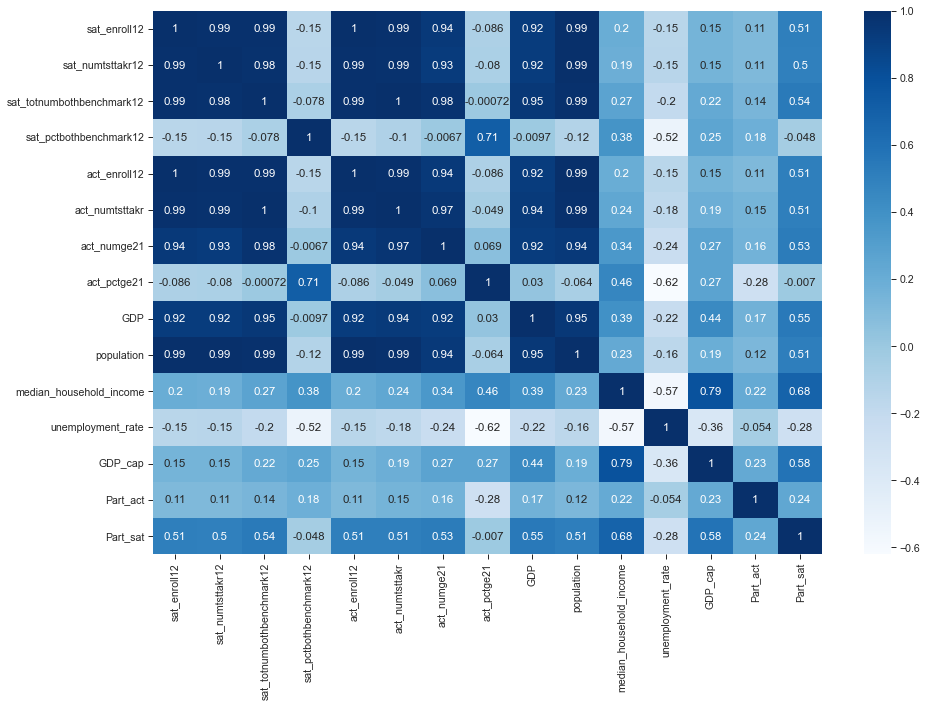

In [104]:
## Overview of the relation between each dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="Blues")

### 2.4.1 Overview of the ranking of test performances across the counties

In [105]:
#data preposessing 
df_plot_1 = df[['sat_pctbothbenchmark12','cname','act_pctge21','Caucuses']].reset_index(drop=True)
df_plot_1.fillna(df['sat_pctbothbenchmark12'].mean(),inplace=True)
df_plot_1.fillna(df['act_pctge21'].mean(),inplace=True)
df_plot_1['combined'] = (df_plot_1['sat_pctbothbenchmark12']+df_plot_1['act_pctge21'])/2
df_plot_1 = df_plot_1.sort_values(by='combined', ascending=False)

Text(0.5, 1.0, 'Ranking of performance of both tests by county of California 2019')

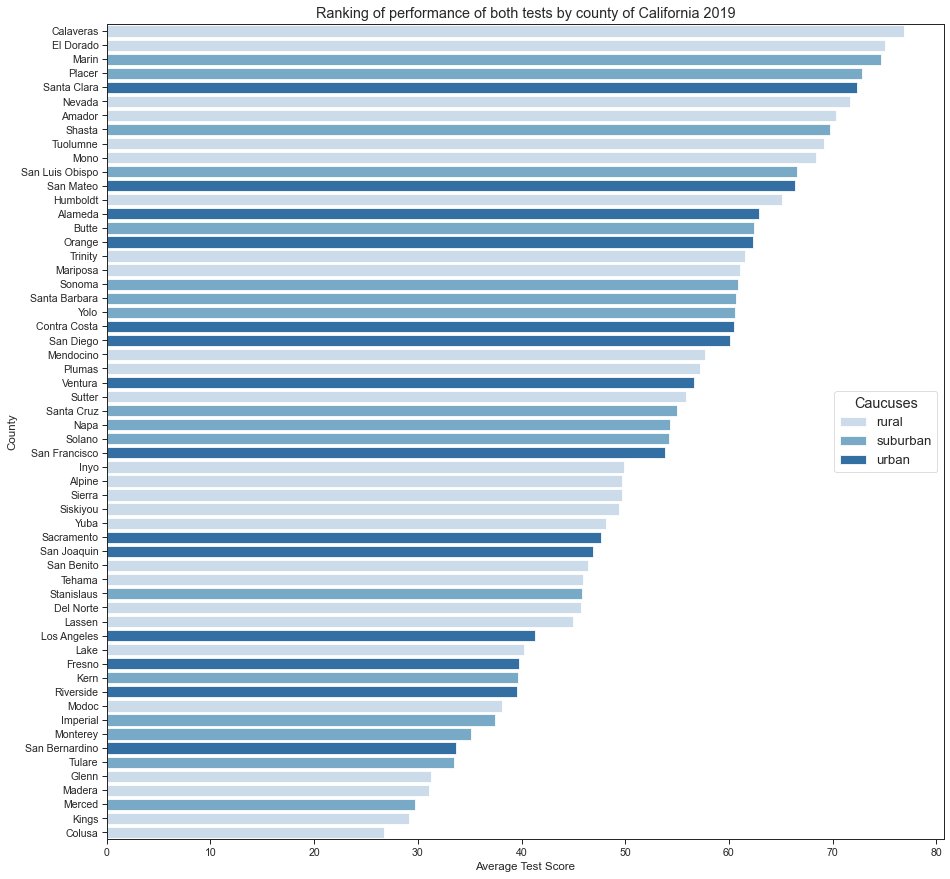

In [106]:
fig,ax = plt.subplots(figsize=(15,15))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='combined', y='cname',hue='Caucuses', dodge=False,data=df_plot_1,palette='Blues')
plt.xlabel('Average Test Score')
plt.ylabel('County')
plt.title('Ranking of performance of both tests by county of California 2019')

### 2.4.2 Overview of the ranking of test participation rate across the counties

In [107]:
#data preposessing 
df_plot2_1 = df_part_corr[['Part_act','Part_sat','cname','Caucuses']].reset_index(drop=True)
df_plot2_1['combined'] = (df_plot2_1['Part_act']+df_plot2_1['Part_sat'])/2
df_plot2_1 = df_plot2_1.sort_values(by='combined', ascending=False)

Text(0.5, 1.0, 'Ranking of participation rate both tests in different county of California 2019')

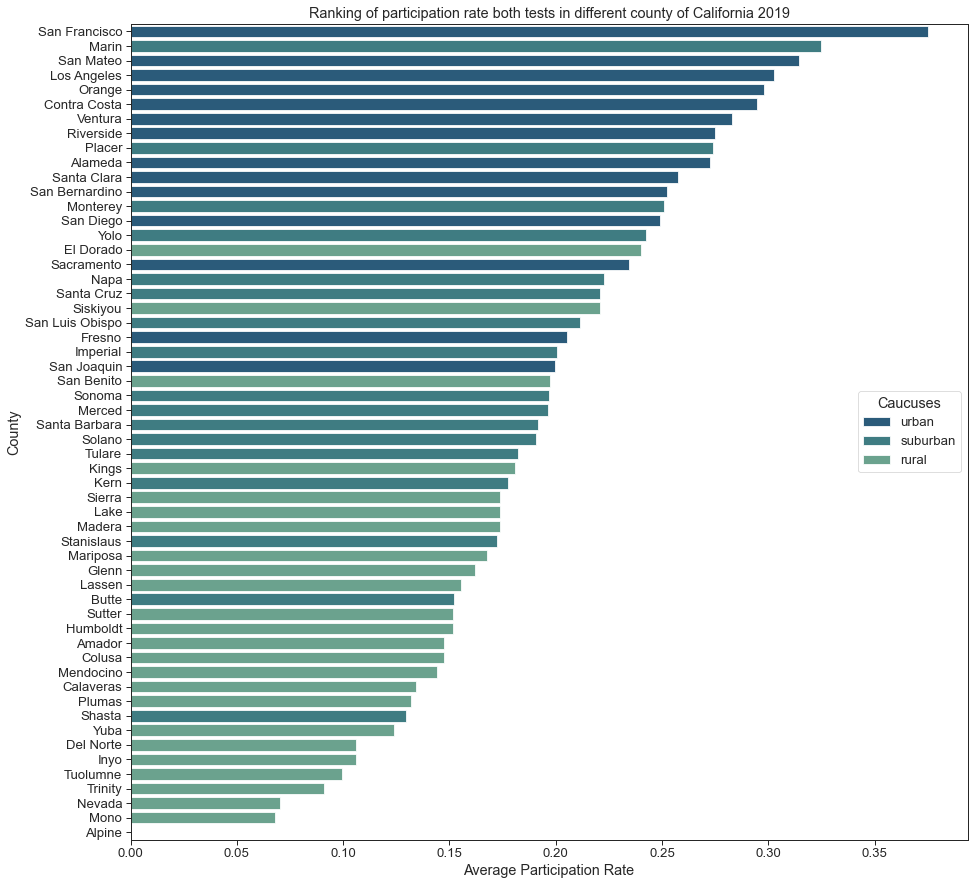

In [108]:
fig,ax = plt.subplots(figsize=(15,15))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='combined', y='cname',hue='Caucuses', dodge=False, data=df_plot2_1,palette="crest_r")
plt.xlabel('Average Participation Rate')
plt.ylabel('County')
plt.title('Ranking of participation rate both tests in different county of California 2019')


### 2.4.3 Test performance versus GDP per capital across the counties

In [109]:
#data preposessing 
df_plot1_1 = df[['sat_pctbothbenchmark12','cname','GDP_cap']].sort_values(by='GDP_cap', ascending=True).reset_index(drop=True)
df_plot1_1['test'] = "sat"
df_plot1_1.rename(columns={'sat_pctbothbenchmark12':"score"},inplace=True)
df_plot1_2 = df[['act_pctge21','cname','GDP_cap']].sort_values(by='GDP_cap', ascending=True).reset_index(drop=True)
df_plot1_2['test'] = "act"
df_plot1_2.rename(columns={'act_pctge21':"score"},inplace=True)
df_plot1_1.fillna(df['sat_pctbothbenchmark12'].mean(),inplace=True)
df_plot1_2.fillna(df['act_pctge21'].mean(),inplace=True)
df_plot1 = pd.concat([df_plot1_1,df_plot1_2],ignore_index=True)

Text(0.5, 1.0, 'Performance of tests versus GDP per capital in Califonia County 2019\nACT R = 0.26\nSAT R = 0.25')

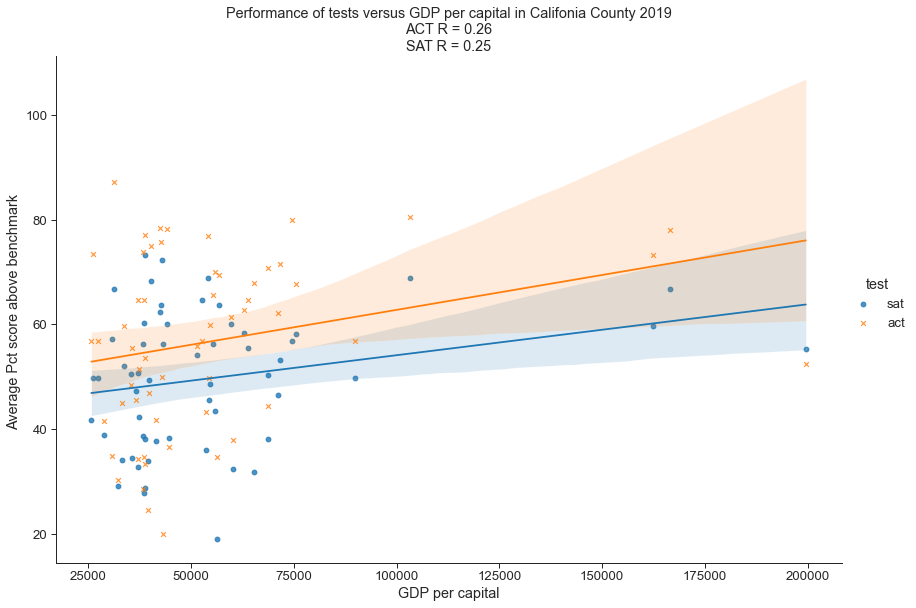

In [110]:
#plotting
sns.set_context('paper', font_scale=1.5)

sns.lmplot(x='GDP_cap', y="score", hue='test', data=df_plot1,markers=["o", "x"],
           height=8, aspect=1.5)

plt.xlabel('GDP per capital')
plt.ylabel('Average Pct score above benchmark ')
plt.title('Performance of tests versus GDP per capital in Califonia County 2019\nACT R = 0.26\nSAT R = 0.25')

### 2.4.4 Test participation rate versus GDP per capital across the counties

In [111]:
#data preposessing 
df_plot3_1 = df_part_corr[['Part_act','cname','GDP_cap','Caucuses']].sort_values(by='GDP_cap', ascending=True).reset_index(drop=True)
df_plot3_1['test'] = "act"
df_plot3_1.rename(columns={'Part_act':"Part"},inplace=True)
df_plot3_2 = df_part_corr[['Part_sat','cname','GDP_cap']].sort_values(by='GDP_cap', ascending=True).reset_index(drop=True)
df_plot3_2['test'] = "sat"
df_plot3_2.rename(columns={'Part_sat':"Part"},inplace=True)
df_plot3 = pd.concat([df_plot3_1,df_plot3_2],ignore_index=True)

Text(0.5, 1.0, 'Participationrate versus GDP Califonia County 2019\nACT R = 0.49\nSAT R = 0.57')

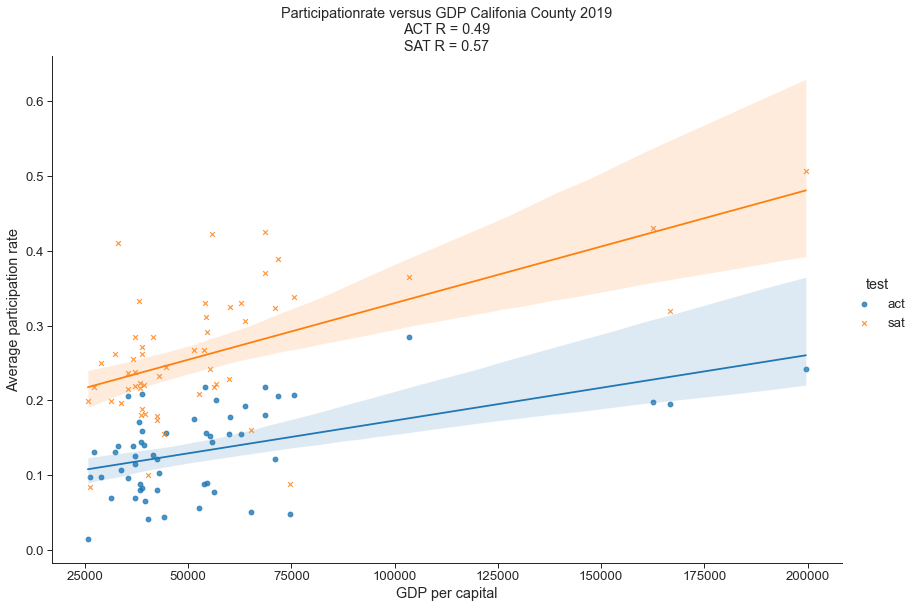

In [112]:
#plotting
sns.set_context('paper', font_scale=1.5)

sns.lmplot(x='GDP_cap', y="Part", hue='test', data=df_plot3,markers=["o", "x"],
           height=8, aspect=1.5)

plt.xlabel('GDP per capital')
plt.ylabel('Average participation rate')
plt.title('Participationrate versus GDP Califonia County 2019\nACT R = 0.49\nSAT R = 0.57')

### 2.4.5 Normalized plot to shows the association of urbanisation of counties to tests

In [113]:
#data preprocessing
df_plot4_1 = df[['sat_pctbothbenchmark12','act_pctge21','Part_act','Part_sat','cname','GDP_cap','Caucuses']]
df_plot4_1['sat_pctbothbenchmark12'].fillna(df['sat_pctbothbenchmark12'].mean(), inplace=True)
df_plot4_1['act_pctge21'].fillna(df['act_pctge21'].mean(), inplace=True)
df_plot4_1['Part_act'].fillna(df['Part_act'].mean(), inplace=True)
df_plot4_1['Part_sat'].fillna(df['Part_sat'].mean(), inplace=True)
df_plot4_1['Mean_Score'] = ((df_plot4_1['sat_pctbothbenchmark12']+df_plot4_1['act_pctge21'])/2)/((df['sat_pctbothbenchmark12'].mean()+df['act_pctge21'].mean())/2)-1
df_plot4_1['Mean_Part'] = ((df_plot4_1['Part_act']+df_plot4_1['Part_sat'])/2)/((df['Part_act'].mean()+df['Part_sat'].mean())/2)-1

C:\Users\Sing\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Sing\AppData\Local\Temp/ipykernel_18640/625651657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot4_1['Mean_Score'] = ((df_plot4_1['sat_pctbothbenchmark12']+df_plot4_1['act_pctge21'])/2)/((df['sat_pctbothbenchmark12'].mean()+df['act_pctge21'].mean())/2)-1
C:\Users\Sing\AppData\Local\Temp/ipykernel_18640/625651657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

C:\Users\Sing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 11.55199999999991, 'Normalized Combined Test Score')

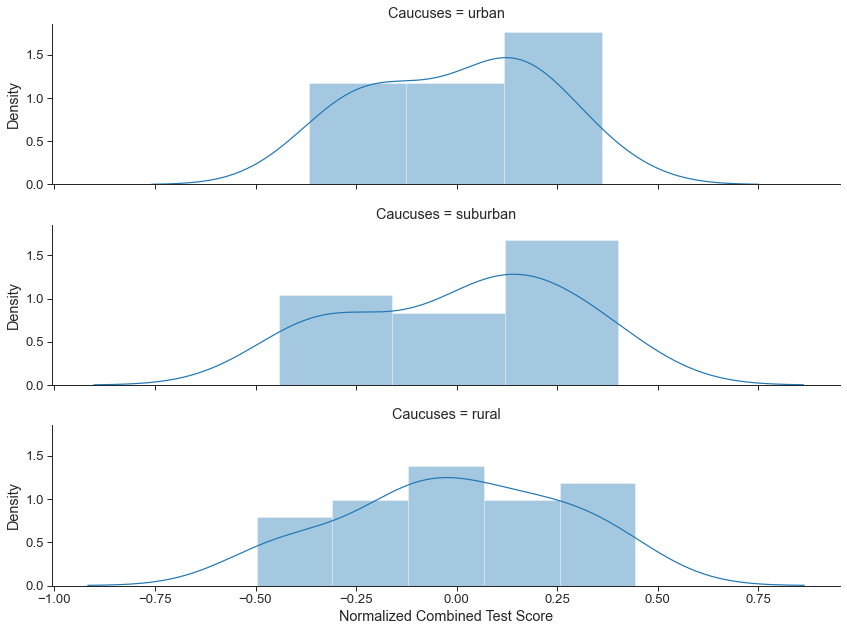

In [114]:
sns.set_context('paper', font_scale=1.5)
fg = sns.FacetGrid(df_plot4_1, row='Caucuses',row_order=["urban", "suburban","rural"], palette="Set1",height=3, aspect=4)
fg.map(sns.distplot, 'Mean_Score')
plt.xlabel('Normalized Combined Test Score')

C:\Users\Sing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 11.55199999999991, 'Normalized Participation Rate')

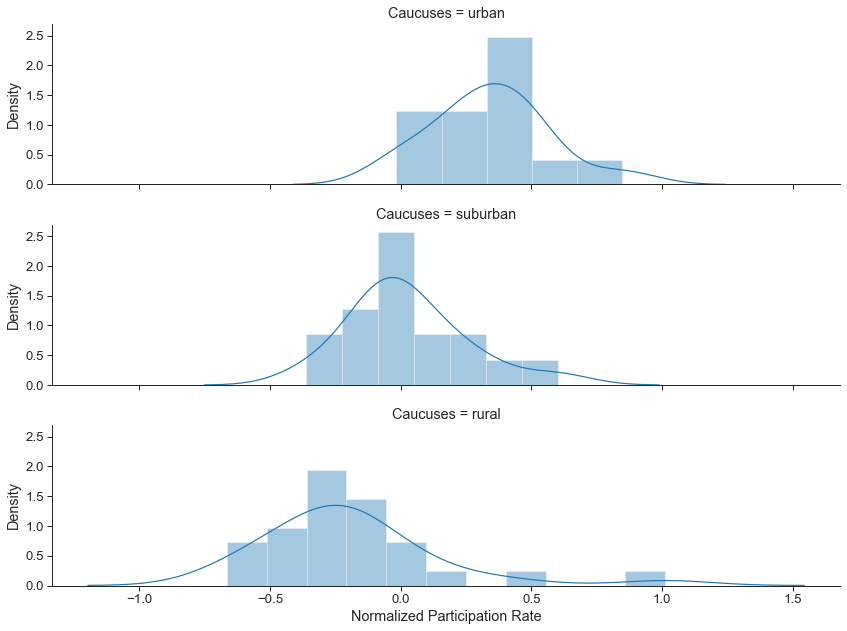

In [115]:
sns.set_context('paper', font_scale=1.5)

fg = sns.FacetGrid(df_plot4_1, row='Caucuses',row_order=["urban", "suburban","rural"], palette="blues",height=3, aspect=4)
plt.title('Comparison of Average participationrate in different county by caucuses in Califonia 2019')
fg.map(sns.distplot, 'Mean_Part')
plt.xlabel('Normalized Participation Rate')

### Plots for presentations

In [116]:
df_plot3_1 = df_part_corr[['Part_act','cname','GDP_cap','Caucuses']].sort_values(by='GDP_cap', ascending=True).reset_index(drop=True)
df_plot3_2 = df_part_corr[['Part_sat','cname','GDP_cap','Caucuses']].sort_values(by='GDP_cap', ascending=True).reset_index(drop=True)

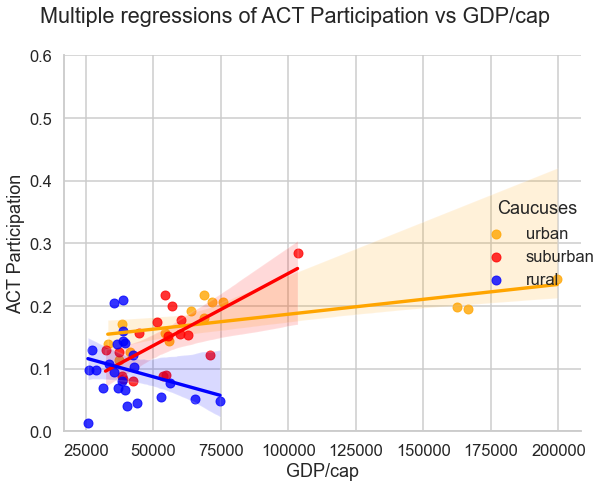

In [117]:
sns.set_context('talk')
sns.set_style('whitegrid')

#set hue order based on above colors
hue_order = ['urban','suburban','rural']
g = sns.lmplot(data=df_plot3_1, x='GDP_cap', y='Part_act', hue='Caucuses', height=7,
               palette=["orange", "red", "blue"], hue_order=hue_order)

# Provide the title, x axis and y axis
plt.suptitle("Multiple regressions of ACT Participation vs GDP/cap")
plt.tight_layout()
plt.ylim(0,0.6)
g.set_axis_labels("GDP/cap", "ACT Participation");

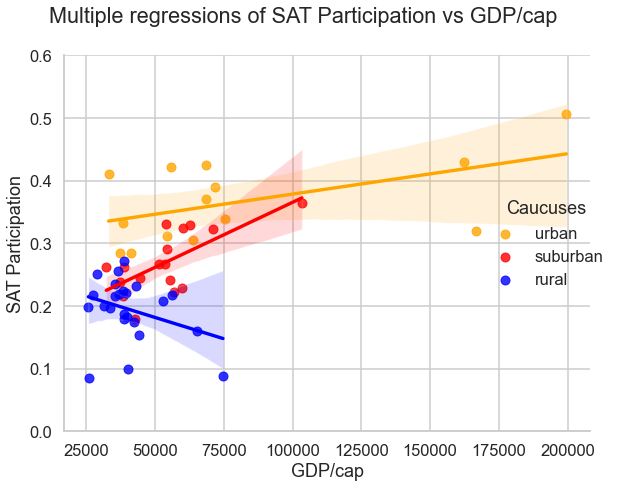

In [118]:
sns.set_context('talk')
sns.set_style('whitegrid')

#set hue order based on above colors
hue_order = ['urban','suburban','rural']
g = sns.lmplot(data=df_plot3_2, x='GDP_cap', y='Part_sat', hue='Caucuses', height=7,
               palette=["orange", "red", "blue"], hue_order=hue_order)

# Provide the title, x axis and y axis
plt.suptitle("Multiple regressions of SAT Participation vs GDP/cap")
plt.tight_layout()
plt.ylim(0,0.6)
g.set_axis_labels("GDP/cap", "SAT Participation");

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

### Conclusion
#### There is a distinct positive correlation between two tests (ACT and SAT) in terms on their scorings and participation rates across the county, where both of participation rate and test score positively associated with the urbanization of the counties. However, the participation rate shows much stronger correlation than scores with the caucuses.Thus data scientists from California Department of Education decided to have further analysis on the participation rate with macroeconomic factor(GDP).However, some of the trends are not reflective of Rural counties which might be due to reasons such as cultural norms or geography (not covered in this study).
#### This map below shows the correlation between GDP per capita and participation rates for counties of California in 2019. When a county has higher GDP, it has darker map colour and same goes to participation rate which represented by brown circles.

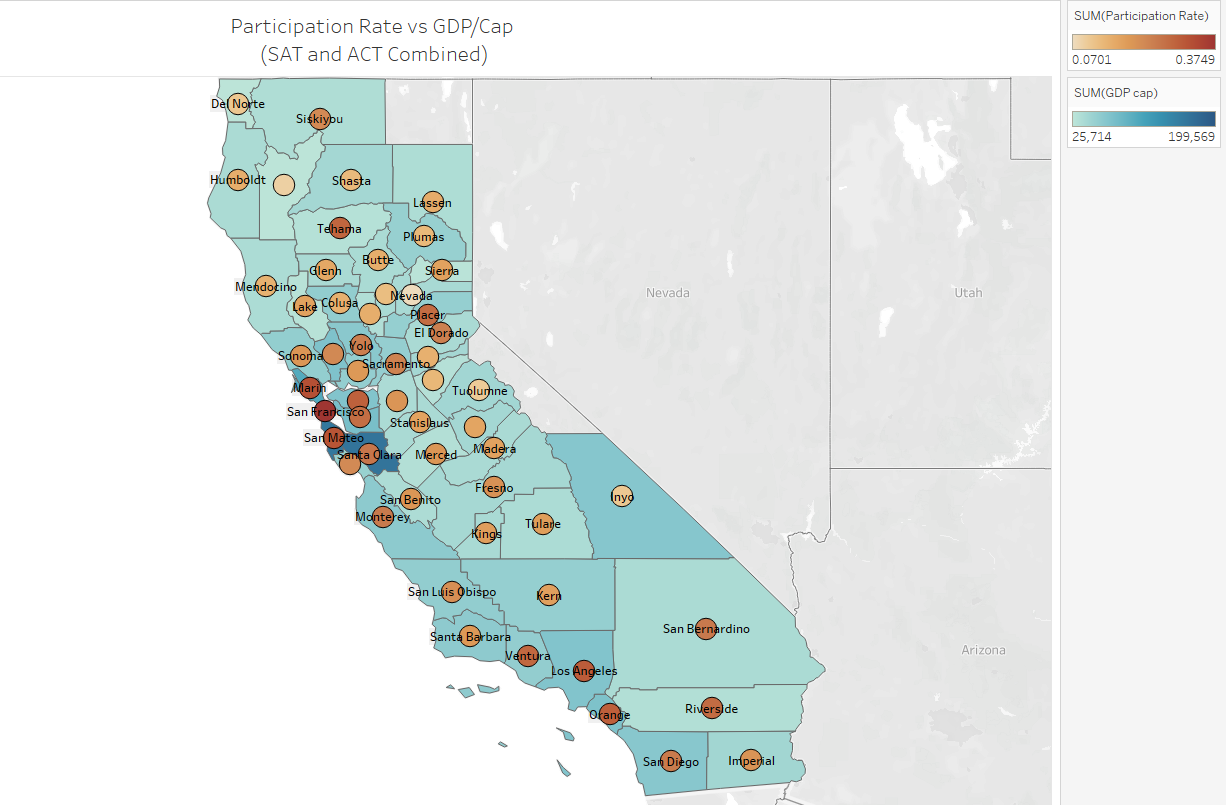

In [119]:
Image(filename='Part_rate_vs_GDP.png') 

#### From the results, it can be concluded there is a positive correlation between participation rate of tests with GDP of county. That is significatly true for urban counties, all the urban counties has participation rate in SAT test that higher than the mean (26.2%).

### Recommendations
#### - Allocate more budget to establish scholarship programs for students in lower GDP counties.
#### - Improve the educational institution and facilities in counties with lower GDP.
#### - Organise campaign that involves school from multiple counties to connect the students and convince the students from the rural counties that colleges and universities are able to provide the necessary skills. 
#### - Increase the salary or paying more incentives for teachers who giving college-preparatory classes in rural counties. 
#### - Provide free/subsidized preparation courses and test for low-income students

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!